In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline
import wbgapi as wb
import matplotlib.patches as patches

In [2]:
url = "https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/BarPlotsMultipleVariables.dta"

data = pd.read_stata(url)
data


,hh_id,round,w_Main_Paddy_Prod,w_Upland_Paddy_Prod,w_Spring_Winter_Maize_Prod,w_Summer_Maize_Prod,w_Wheat_Prod,w_Spring_Winter_Potato_Prod,w_Summer_Potato_Prod,w_Millet_Prod,...,ml_w_Beans_Prod,bl_w_Soybeans_Prod,ml_w_Soybeans_Prod,bl_w_Lentil_Prod,ml_w_Lentil_Prod,bl_w_Black_Gram_Prod,ml_w_Black_Gram_Prod,bl_w_Pea_Prod,ml_w_Pea_Prod,treatment_group
0,520209,2.0,379.293945,NaN,NaN,96.682770,53.299477,297.485443,NaN,44.622818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,520211,1.0,33.076530,NaN,NaN,130.238831,50.303890,150.911667,NaN,24.807398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,520224,1.0,64.793953,NaN,28.797314,71.993286,14.398657,100.790596,NaN,86.391937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,520224,2.0,41.327240,NaN,NaN,82.654480,18.597258,235.565277,NaN,24.796345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,520226,2.0,67.766357,NaN,NaN,77.447266,36.787453,50.340721,NaN,NaN,...,3.872363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,754124,1.0,NaN,NaN,NaN,66.498230,47.287632,NaN,NaN,NaN,...,NaN,2.068834,NaN,NaN,NaN,2.364382,NaN,NaN,NaN,0.0
2709,754128,1.0,NaN,NaN,NaN,NaN,7.013659,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2710,754134,1.0,NaN,74.20826,NaN,86.576302,115.022797,NaN,NaN,NaN,...,NaN,NaN,NaN,1.113124,NaN,0.989443,NaN,NaN,NaN,0.0
2711,754135,2.0,177.508423,NaN,NaN,22.188553,82.097649,17.750843,NaN,NaN,...,NaN,NaN,5.547138,NaN,1.109428,NaN,13.091247,NaN,6.212795,0.0


In [3]:
# Collapse the dataset across each treatment group

data2= (data
       .groupby(['treatment_group'])
       .agg({'treatment_group':'mean', 
             'bl_w_Main_Paddy_Prod':'mean','ml_w_Main_Paddy_Prod':'mean', 
             'bl_w_Spring_Winter_Potato_Prod':'mean', 'ml_w_Spring_Winter_Potato_Prod':'mean',
             'bl_w_Summer_Maize_Prod':'mean', 'ml_w_Summer_Maize_Prod':'mean',
            }))

data2

,treatment_group,bl_w_Main_Paddy_Prod,ml_w_Main_Paddy_Prod,bl_w_Spring_Winter_Potato_Prod,ml_w_Spring_Winter_Potato_Prod,bl_w_Summer_Maize_Prod,ml_w_Summer_Maize_Prod
treatment_group,,,,,,,
0.0,0.0,98.144730,127.181786,46.781124,80.121582,62.291615,73.133759
1.0,1.0,119.025169,139.099319,69.619080,75.556488,57.494331,69.979294


In [4]:
data2_reset=data2.reset_index(drop=True)
data2_reset

,treatment_group,bl_w_Main_Paddy_Prod,ml_w_Main_Paddy_Prod,bl_w_Spring_Winter_Potato_Prod,ml_w_Spring_Winter_Potato_Prod,bl_w_Summer_Maize_Prod,ml_w_Summer_Maize_Prod
0,0.0,98.144730,127.181786,46.781124,80.121582,62.291615,73.133759
1,1.0,119.025169,139.099319,69.619080,75.556488,57.494331,69.979294


In [5]:
data3 = pd.melt(data2_reset, id_vars=['treatment_group'])
data3


,treatment_group,variable,value
0,0.0,bl_w_Main_Paddy_Prod,98.144730
1,1.0,bl_w_Main_Paddy_Prod,119.025169
2,0.0,ml_w_Main_Paddy_Prod,127.181786
3,1.0,ml_w_Main_Paddy_Prod,139.099319
4,0.0,bl_w_Spring_Winter_Potato_Prod,46.781124
5,1.0,bl_w_Spring_Winter_Potato_Prod,69.619080
6,0.0,ml_w_Spring_Winter_Potato_Prod,80.121582
7,1.0,ml_w_Spring_Winter_Potato_Prod,75.556488
8,0.0,bl_w_Summer_Maize_Prod,62.291615
9,1.0,bl_w_Summer_Maize_Prod,57.494331


In [6]:
cond = data3['variable'].str.contains('bl', case = False)
data3['name']= np.where(cond, 'bl', 'ml')
data3

,treatment_group,variable,value,name
0,0.0,bl_w_Main_Paddy_Prod,98.144730,bl
1,1.0,bl_w_Main_Paddy_Prod,119.025169,bl
2,0.0,ml_w_Main_Paddy_Prod,127.181786,ml
3,1.0,ml_w_Main_Paddy_Prod,139.099319,ml
4,0.0,bl_w_Spring_Winter_Potato_Prod,46.781124,bl
5,1.0,bl_w_Spring_Winter_Potato_Prod,69.619080,bl
6,0.0,ml_w_Spring_Winter_Potato_Prod,80.121582,ml
7,1.0,ml_w_Spring_Winter_Potato_Prod,75.556488,ml
8,0.0,bl_w_Summer_Maize_Prod,62.291615,bl
9,1.0,bl_w_Summer_Maize_Prod,57.494331,bl


In [7]:
def change (q):
    variable = str(q['variable'])
    if variable == 'ml_w_Main_Paddy_Prod' or 'bl_w_Main_Paddy_Prod':
        if 'Main' in variable:
            return ('Main_Paddy_Prod')
        elif 'Potato' in variable:
            return ('Spring_Winter_Potato_Prod')
        elif 'Maize' in variable:
            return ('Summer_Maize_Prod')
    else:
        pass

data3["variable"] = data3.apply(change, axis=1)
data3

,treatment_group,variable,value,name
0,0.0,Main_Paddy_Prod,98.144730,bl
1,1.0,Main_Paddy_Prod,119.025169,bl
2,0.0,Main_Paddy_Prod,127.181786,ml
3,1.0,Main_Paddy_Prod,139.099319,ml
4,0.0,Spring_Winter_Potato_Prod,46.781124,bl
5,1.0,Spring_Winter_Potato_Prod,69.619080,bl
6,0.0,Spring_Winter_Potato_Prod,80.121582,ml
7,1.0,Spring_Winter_Potato_Prod,75.556488,ml
8,0.0,Summer_Maize_Prod,62.291615,bl
9,1.0,Summer_Maize_Prod,57.494331,bl


In [8]:
data3['name.group'] = data3.name.astype(str).str.cat(data3[['treatment_group']].astype(str), sep = '.')
data3


,treatment_group,variable,value,name,name.group
0,0.0,Main_Paddy_Prod,98.144730,bl,bl.0.0
1,1.0,Main_Paddy_Prod,119.025169,bl,bl.1.0
2,0.0,Main_Paddy_Prod,127.181786,ml,ml.0.0
3,1.0,Main_Paddy_Prod,139.099319,ml,ml.1.0
4,0.0,Spring_Winter_Potato_Prod,46.781124,bl,bl.0.0
5,1.0,Spring_Winter_Potato_Prod,69.619080,bl,bl.1.0
6,0.0,Spring_Winter_Potato_Prod,80.121582,ml,ml.0.0
7,1.0,Spring_Winter_Potato_Prod,75.556488,ml,ml.1.0
8,0.0,Summer_Maize_Prod,62.291615,bl,bl.0.0
9,1.0,Summer_Maize_Prod,57.494331,bl,bl.1.0


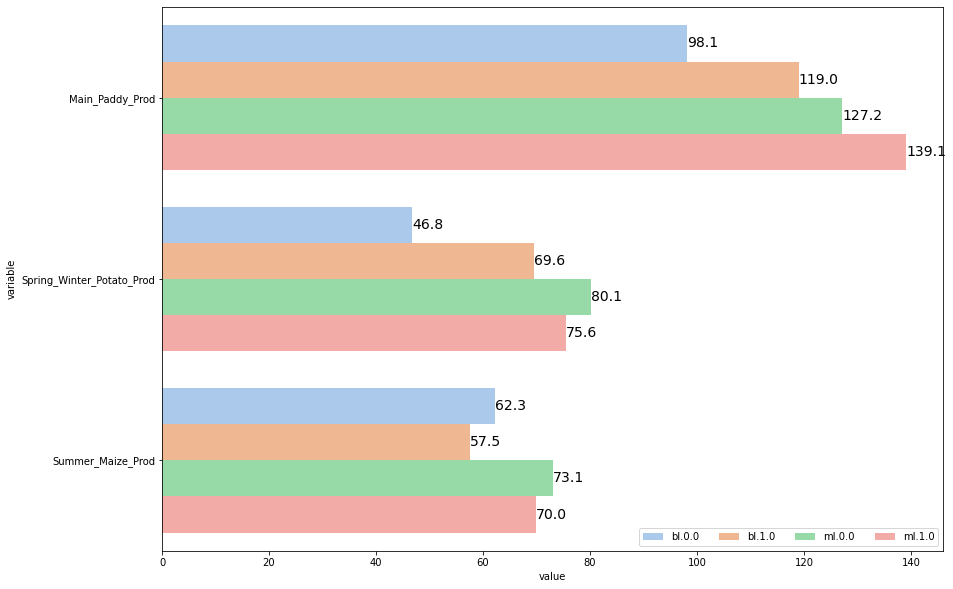

In [9]:
plt.figure(figsize=(14,10))

ax = sns.barplot(data = data3, x = 'value', y = 'variable', hue = 'name.group', palette ='pastel')

plt.bar_label(ax.containers[0], fmt='%.1f', fontsize = 14)
plt.bar_label(ax.containers[1], fmt='%.1f', fontsize = 14)
plt.bar_label(ax.containers[2], fmt='%.1f', fontsize = 14)
plt.bar_label(ax.containers[3], fmt='%.1f', fontsize = 14)

plt.legend(loc="lower right", ncol = len(ax.lines))
plt.show()
